# Google Vision API Usage

## Prerequiste Knowledge

### Google Coud Client Libraries

Google Cloud Client Libraries provide authentication, authorization, and accessing each service programmatically. It generates HTTP or RPC requests that call Google Cloud Services.

[Google Cloud Client Libraries](https://cloud.google.com/apis/docs/cloud-client-libraries)

[Client Libraries Explained](https://cloud.google.com/apis/docs/client-libraries-explained)

[Google Cloud Client Libraries: Github](https://github.com/googleapis/google-cloud-python)

### Service Account
Service Account is a special type of account that represent non-human user. It is equivalent to "role" in AWS. 

[Understanding service account](https://cloud.google.com/iam/docs/understanding-service-accounts)

# Installation

Install google-cloud-vision package. 

$ pip install google-cloud-vision

### Sample code reference
https://googleapis.dev/python/vision/latest/index.html

IMAGE URL :  gs://vision-ai-experimentation/images/changi_airport.jpeg


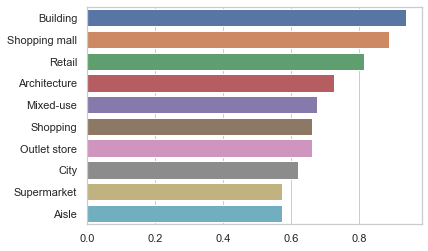

In [12]:
from google.cloud import vision
import pandas as pd
import seaborn as sns
from google.cloud import storage

# Set Parameters
IMAGE_INDEX = 1

# Get images from google cloud storage. 
bucket_name = "vision-ai-experimentation"
storage_client = storage.Client()
bucket_gs_link = "gs://vision-ai-experimentation/"

blobs = storage_client.list_blobs(bucket_name, prefix="images")

image_links = []
for blob in blobs:
    if blob.name.endswith(".jpeg"): 
        image_gs_link = bucket_gs_link + blob.name
        image_links.append(image_gs_link)
        
# Start Cloud vision AI. 
client = vision.ImageAnnotatorClient()

# Call vision API.
# Image resource can be specified only in 3 ways. 
# 1. Google Storage
# 2. base64 data.
# 3. HTTP url. 
response = client.annotate_image({
  'image': {'source': {'image_uri': image_links[IMAGE_INDEX]}}
})

# Preprocessing for visualization. 
descriptions = []
scores = []
for label in response.label_annotations:
    descriptions.append(label.description)
    scores.append(label.score)
    
dic = {"description": descriptions, "score": scores}

print("IMAGE URL : ", image_links[IMAGE_INDEX])

# Visualization with seaborn. 
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(y="description", x="score", data=dic)